In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\Kanika Saini\\Downloads\\Wallmart-sales forecast\\Wallmart-sales forecast")

In [78]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [48]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [49]:
print(features.isnull().sum())
print(train.isnull().sum())
print(stores.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64


In [79]:
dataset  = pd.merge(train, stores, on='Store', how='left')

In [51]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [9]:
dataset.shape

(421570, 7)

In [80]:
dataset = pd.merge(dataset,features, on=['Store','Date','IsHoliday'], how='left')

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [54]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [55]:
dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [56]:
 dataset.fillna(value=-99999,inplace = True)

In [57]:
dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,-61666.464097,-72730.315044,-67012.082938,-66900.864215,-62415.624707,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,51635.094088,45802.711734,47834.331011,48362.713766,50324.351413,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [58]:
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [59]:
dataset.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,211.350143,8.106


In [60]:
dataset.shape

(421570, 16)

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.distplot(a=dataset["Weekly_Sales"],rug=True)

In [61]:

scaler=StandardScaler()
dt=scaler.fit_transform(dataset[["Weekly_Sales","Temperature","CPI","Unemployment"]])


In [62]:
dt=pd.DataFrame(dt,columns=["Weekly_Sales","Temperature","CPI","Unemployment"])

In [63]:
dataset=dataset.drop(["Weekly_Sales","Temperature","CPI","Unemployment"],axis=1)

In [64]:
frames=[dataset,dt]
dt=pd.concat(frames,axis=1) 

In [65]:
dt.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales,Temperature,CPI,Unemployment
0,1,1,2010-02-05,False,A,151315,2.572,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,0.393782,-0.963798,1.018774,0.078201
1,1,1,2010-02-12,True,A,151315,2.548,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,1.323501,-1.169783,1.022498,0.078201
2,1,1,2010-02-19,False,A,151315,2.514,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,1.127829,-1.092810,1.023697,0.078201
3,1,1,2010-02-26,False,A,151315,2.561,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,0.150687,-0.729625,1.024476,0.078201
4,1,1,2010-03-05,False,A,151315,2.625,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,0.257435,-0.736672,1.025255,0.078201


**The count of the store number for all the stores is almost equal and is close to 10000*

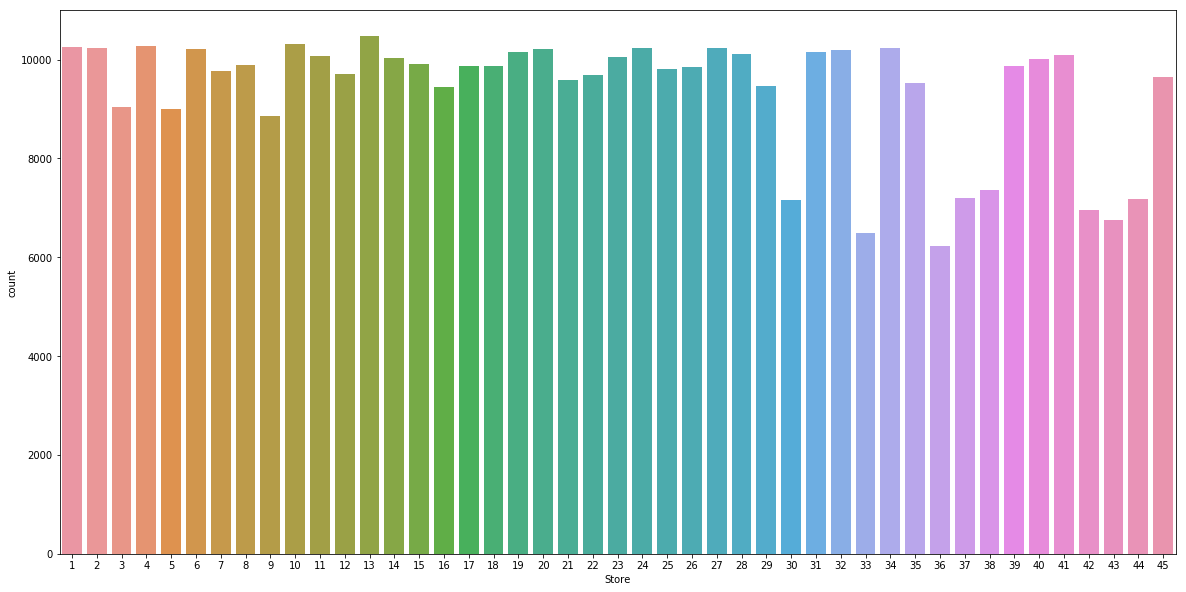

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(dt['Store'])

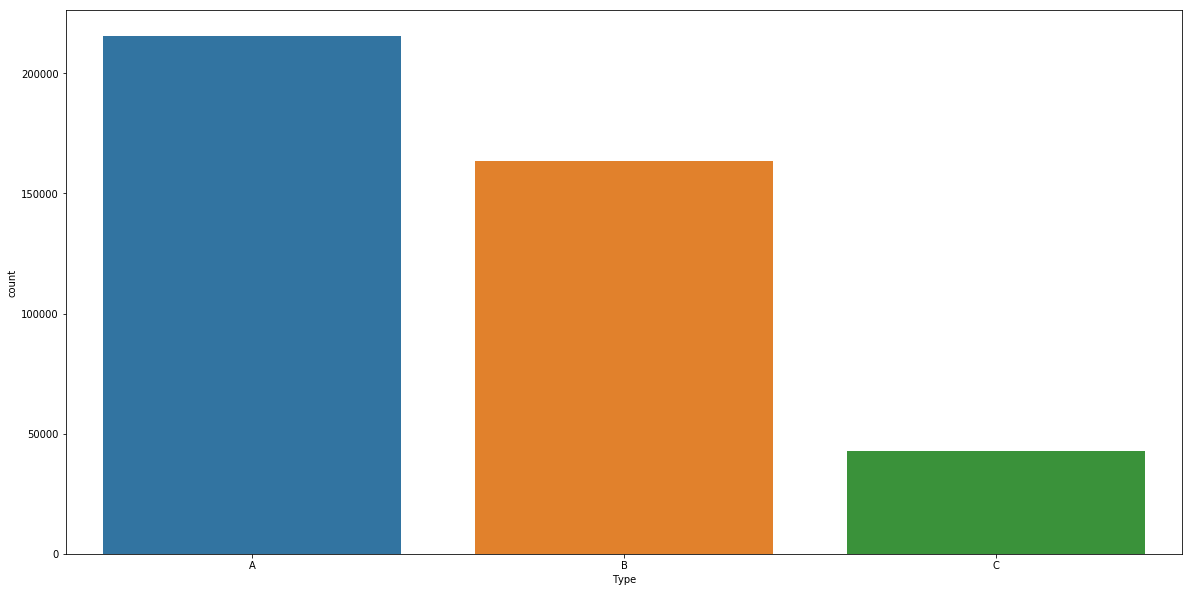

In [57]:
plt.figure(figsize=(20,10))
sns.countplot(dt['Type'])

**From the below plot, it can be concluded that the number of non-working of walmart store is very less when compared to the working days in the span of two years. These holidays might be during public holidays where the superstores might be  open and others might not** 

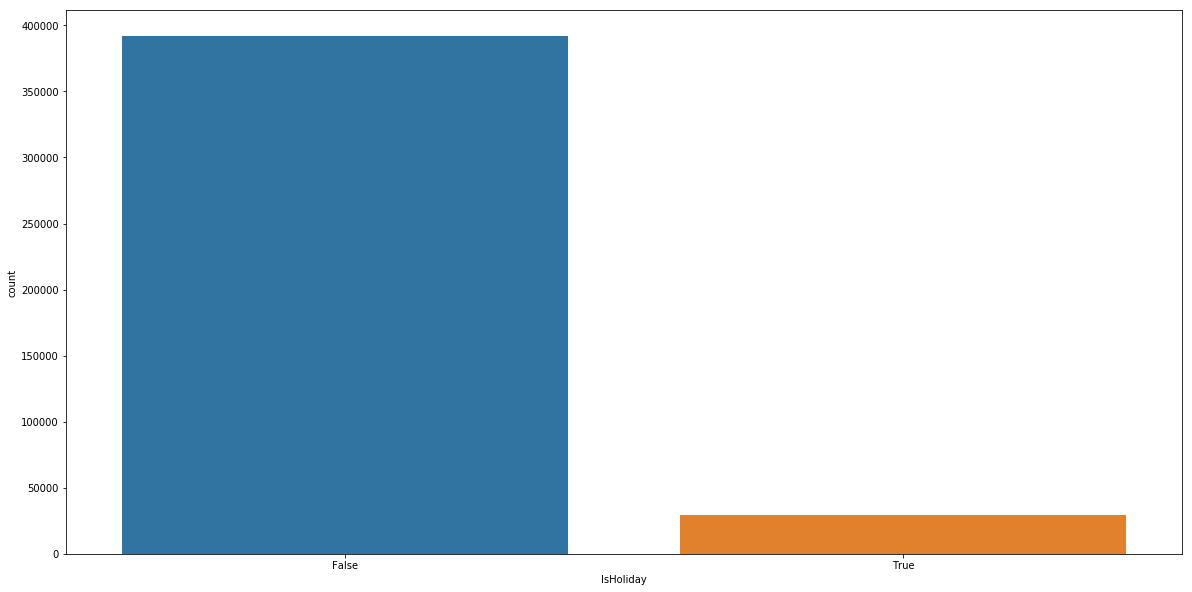

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(dt['IsHoliday'])

**Followig plot shows the distribution of the Weekly Sales. It can be seen that the data is highly right skewed. Most of the weekly sales are below 100000.**

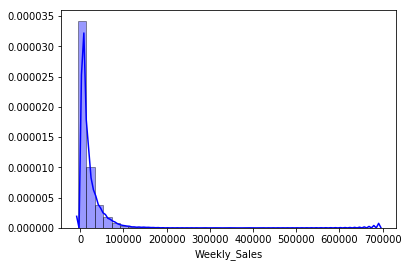

In [82]:
sns.distplot(dataset['Weekly_Sales'],hist='True', bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

**The following histograms show the distributions of each feature. The outliers in the Markdown 1, Markdown 2 , Markdown 3, Markdown 4, Markdown 5 are the missing values that were imputed. The data in Temparature seems to be left skewed. Unemployment data, to some extent is normally distributed. The rest of the variables do not seem to have any distinct distribution.**

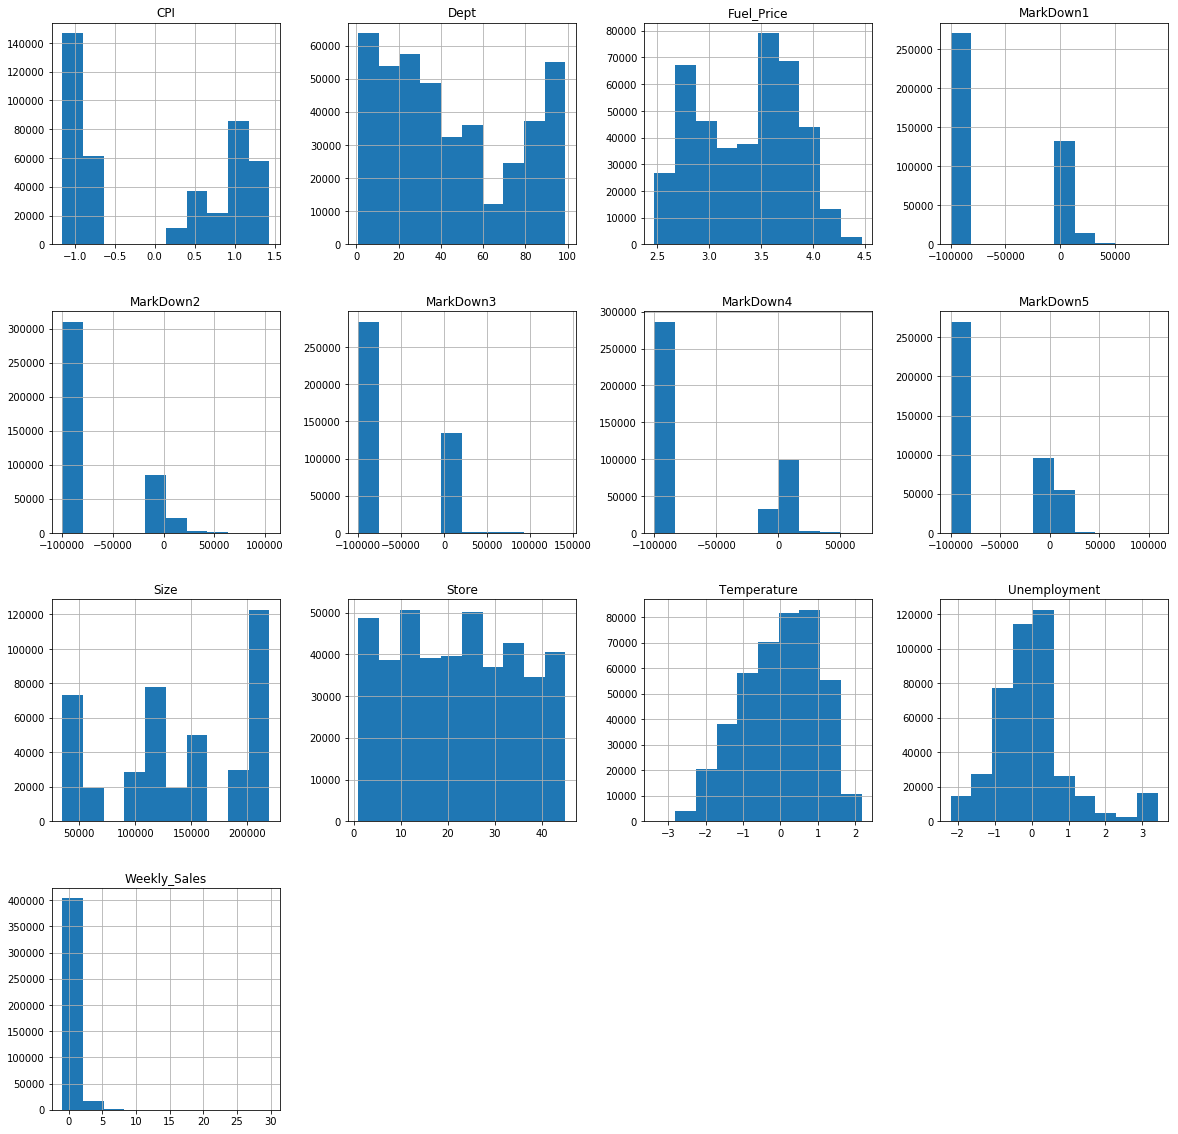

In [74]:
num=dt.select_dtypes(include=['int64','float64'])
num.hist(figsize=(20,20))
plt.show()

**The following correlation table shows the correlation among all the features. An interesting correlation can be seen between Markdown 1, Markdown 2 , Markdown 3, Markdown 4,Markdown 5 and Fuel_Price.  Also, each Markdown feature is well correlated to each other. The size of the store is also slighly related to the weekly sales which is evident because, a large Walmart store will have higher sales when compared to a smaller Walmart store.Many negative correlations can also be seen. Unemployment rate is nowhere related to any of the markdowns. Customer Price index (CPI) and size have a slight correlation with the Markdowns. 

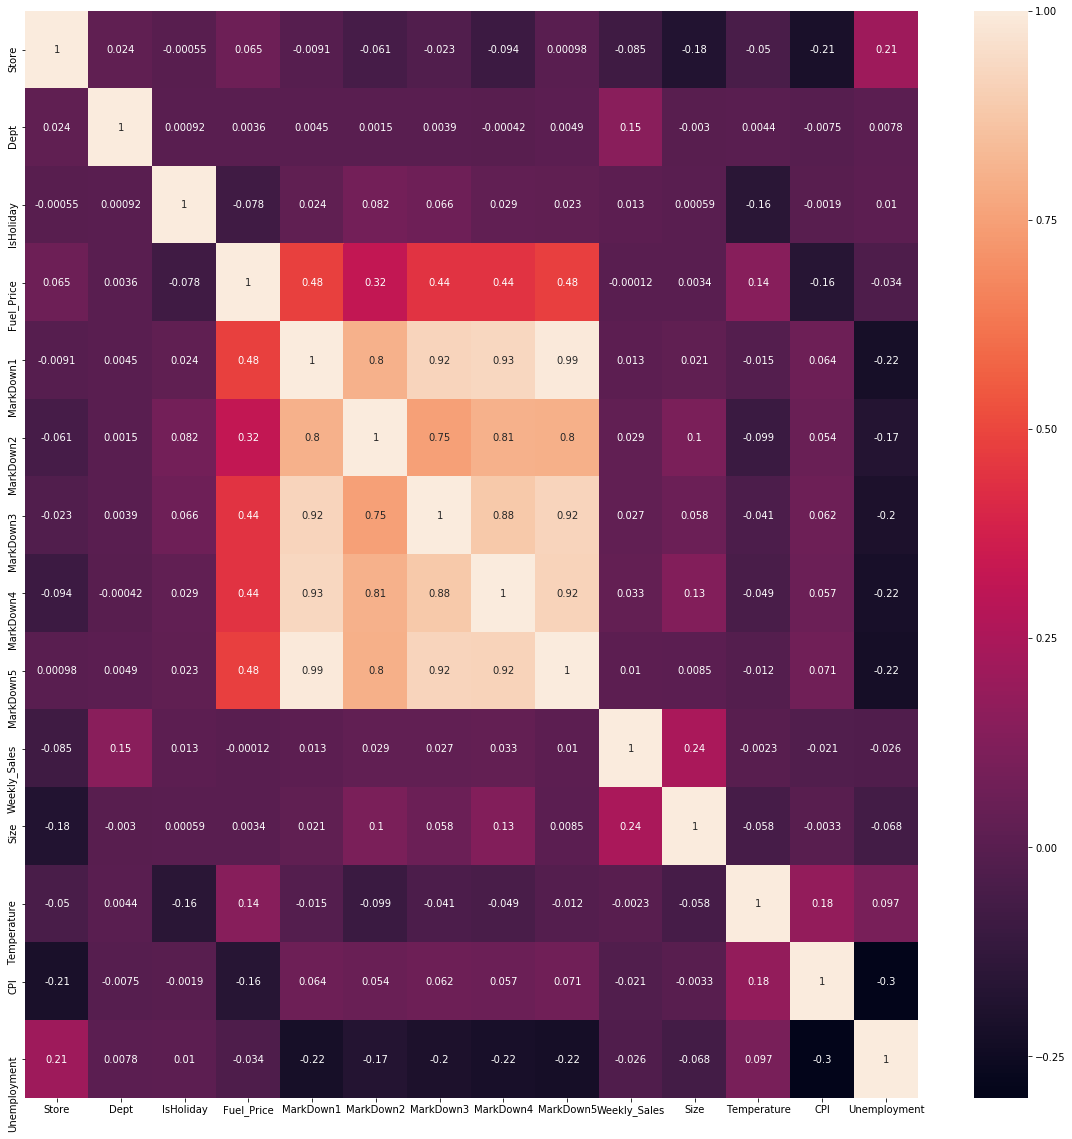

In [40]:
corr=dt.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [44]:
pd.crosstab(dt['IsHoliday'],dt['Type'],margins=True)

Type,A,B,C,All
IsHoliday,,,,
False,200293,151983,39633,391909
True,15185,11512,2964,29661
All,215478,163495,42597,421570


In [ ]:
should we group the size attribute to bins as it is a categorical column. 

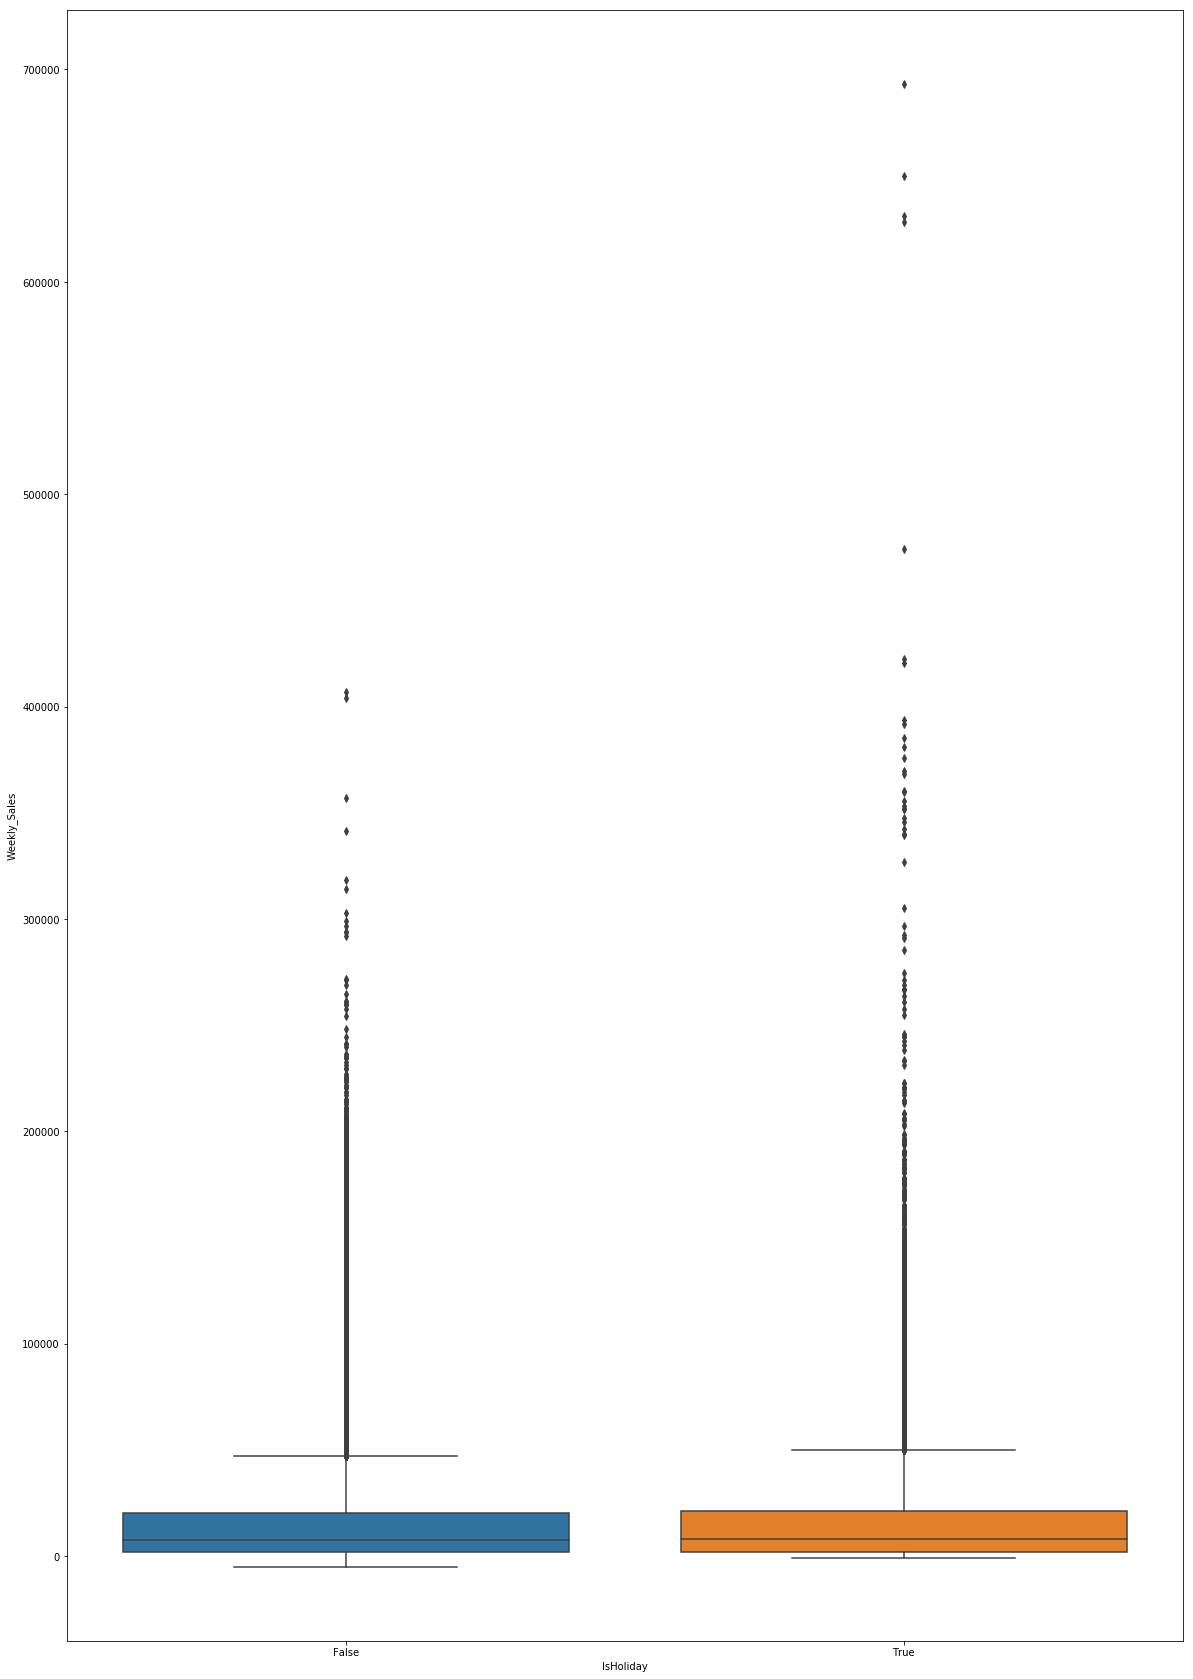

In [87]:
plt.figure(figsize=(20,30))
sns.boxplot(dataset['IsHoliday'],dataset['Weekly_Sales'])